# Photovoltaic System Analysis
In this notebook, we will perform some exploratory data analysis on the photovoltaic (PV) system model. We will simulate the PV system under different conditions and observe how the efficiency and generation change.

In [1]:
# Import necessary libraries",
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
sns.set(style="whitegrid")

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scripts.assets.photovoltaic import PVSystem
IMAGE_SAVING_LOCATION = os.path.join(module_path, 'images','notebook','assets')
# Ensure plots are displayed inline in the Jupyter notebook
%matplotlib inline

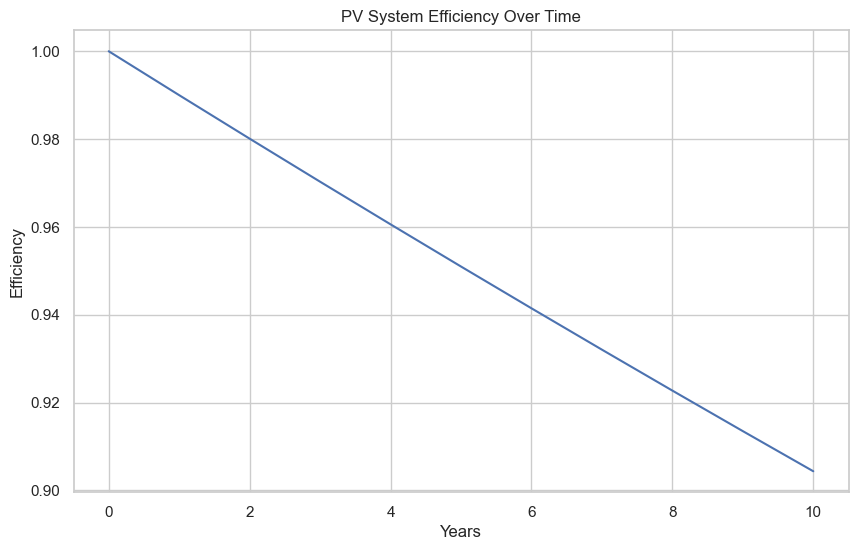

In [2]:
# Initialize the PV system
pv_system = PVSystem(capacity_mw=0.1, initial_efficiency=1.0)

# Simulate efficiency over 10 years
years = range(11)
efficiencies = [pv_system.calculate_current_efficiency(year) for year in years]

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=efficiencies)
plt.xlabel('Years')
plt.ylabel('Efficiency')
plt.title('PV System Efficiency Over Time')
plt.grid(True)
plt.savefig(os.path.join(IMAGE_SAVING_LOCATION, 'pv_efficiency_over_time.png'))
plt.show()



## Simulate PV Generation

We will simulate the energy generation of the PV system under different irradiance conditions and years

  

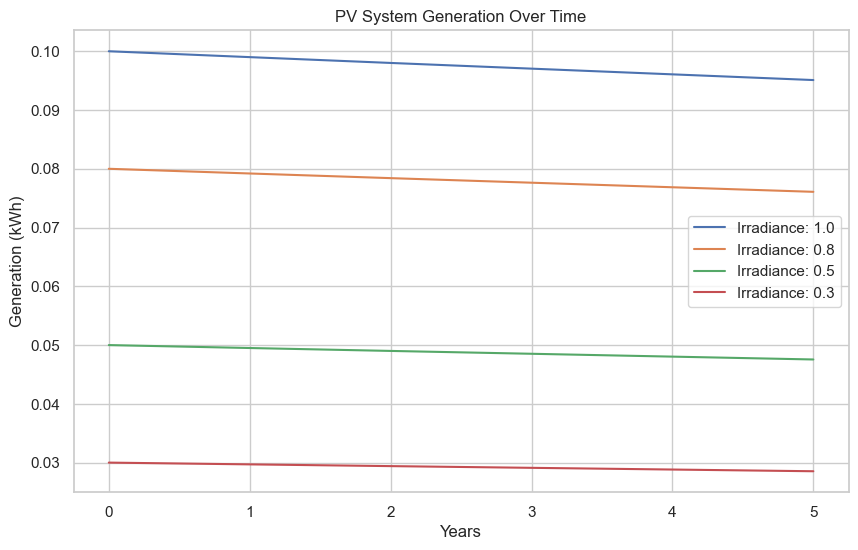

In [3]:
# Define simulation parameters
irradiance_levels = [1.0, 0.8, 0.5, 0.3]
years = [0, 1, 2, 5]

# Simulate generation
generation_results = {}
for irradiance in irradiance_levels:
    generation_results[irradiance] = [pv_system.calculate_generation(irradiance, year) for year in years]

# Plot the results
plt.figure(figsize=(10, 6))
for irradiance, generations in generation_results.items():
    sns.lineplot(x=years, y=generations, label=f'Irradiance: {irradiance}')
plt.xlabel('Years')
plt.ylabel('Generation (kWh)')
plt.title('PV System Generation Over Time')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(IMAGE_SAVING_LOCATION, 'pv_generation_over_time.png'))
plt.show()
